<a href="https://colab.research.google.com/github/RufusRubin/Time-Series-Analysis-Assignment/blob/main/tsa_ma_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

!pip -q install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 44.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd


In [3]:
IBEX = yf.Ticker("^IBEX")

IBEX_values = IBEX.history(start="2020-06-01")

In [4]:
IBEX_values

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-01,7228.700195,7276.000000,7160.100098,7221.399902,291929600,0,0
2020-06-02,7264.000000,7445.299805,7236.899902,7408.100098,402947100,0,0
2020-06-03,7487.299805,7629.700195,7448.899902,7626.399902,445036400,0,0
2020-06-04,7567.700195,7669.200195,7516.000000,7566.799805,514858000,0,0
2020-06-05,7672.000000,7890.399902,7664.100098,7872.600098,573283900,0,0
...,...,...,...,...,...,...,...
2022-06-03,8800.700195,8808.200195,8706.400391,8724.799805,95868700,0,0
2022-06-06,8785.299805,8852.299805,8768.200195,8836.299805,124143400,0,0
2022-06-07,8793.299805,8848.799805,8793.299805,8841.599609,139318200,0,0


In [5]:
import matplotlib.pyplot as plt


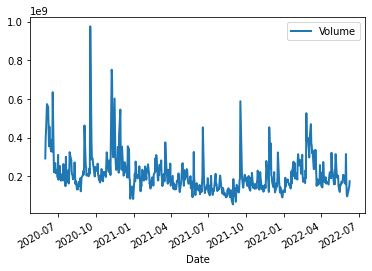

In [6]:
IBEX_values[['Volume']].plot(lw=2);

In [7]:
from statsmodels.tsa.stattools import adfuller
series = IBEX_values[["Volume"]].squeeze()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -5.879238
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [8]:
result[1]

3.106548426560059e-07

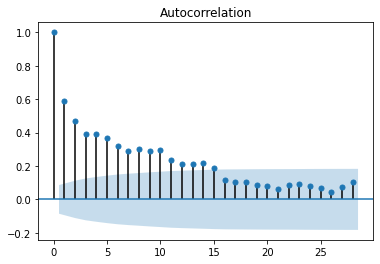

In [9]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(series)
plt.show()

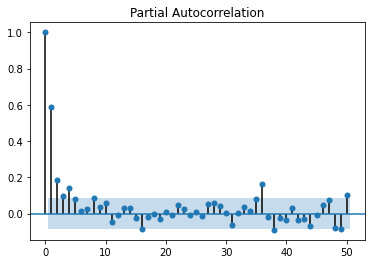

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.show()

In [11]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
series
from statsmodels.tsa.arima_model import ARIMA
ARMA_model = ARIMA(endog=series, order=(0, 0, 15))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  521
Model:                    ARMA(0, 15)   Log Likelihood              -10182.606
Method:                       css-mle   S.D. of innovations       74371143.883
Date:                Thu, 09 Jun 2022   AIC                          20399.212
Time:                        16:35:54   BIC                          20471.560
Sample:                             0   HQIC                         20427.551
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.107e+08   1.17e+07     18.020      0.000    1.88e+08    2.34e+08
ma.L1.Volume      0.4152      0.044      9.503      0.000       0.330       0.501
ma.L2.Volume      0.2845      0.047     

In [12]:
pred=[]
pred = results.predict(0,517)


In [13]:
pred

Date
2020-06-01    2.106821e+08
2020-06-02    2.552421e+08
2020-06-03    3.120930e+08
2020-06-04    3.463541e+08
2020-06-05    3.841533e+08
                  ...     
2022-05-31    1.826789e+08
2022-06-01    2.419637e+08
2022-06-02    1.933414e+08
2022-06-03    1.547494e+08
2022-06-06    1.614069e+08
Length: 518, dtype: float64

In [14]:
series

Date
2020-06-01    291929600
2020-06-02    402947100
2020-06-03    445036400
2020-06-04    514858000
2020-06-05    573283900
                ...    
2022-06-03     95868700
2022-06-06    124143400
2022-06-07    139318200
2022-06-08    145183000
2022-06-09    174009579
Name: Volume, Length: 521, dtype: int64

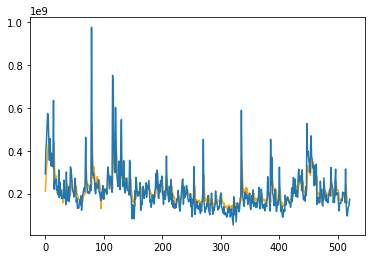

In [15]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [16]:
ARMA_model = ARIMA(endog=series[:500], order=(0, 0, 20))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  500
Model:                    ARMA(0, 20)   Log Likelihood               -9775.310
Method:                       css-mle   S.D. of innovations       74819755.681
Date:                Thu, 09 Jun 2022   AIC                          19594.620
Time:                        16:38:24   BIC                          19687.342
Sample:                             0   HQIC                         19631.004
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.125e+08   1.43e+07     14.913      0.000    1.85e+08     2.4e+08
ma.L1.Volume      0.4084      0.045      9.116      0.000       0.321       0.496
ma.L2.Volume      0.2754      0.049     

In [17]:
series

Date
2020-06-01    291929600
2020-06-02    402947100
2020-06-03    445036400
2020-06-04    514858000
2020-06-05    573283900
                ...    
2022-06-03     95868700
2022-06-06    124143400
2022-06-07    139318200
2022-06-08    145183000
2022-06-09    174009579
Name: Volume, Length: 521, dtype: int64

In [18]:
pred = results.predict(0,517)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


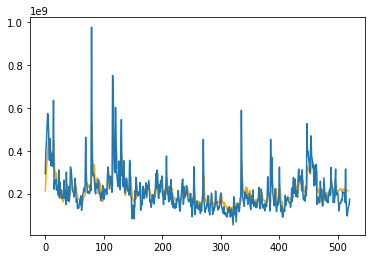

In [19]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [20]:

from sklearn.metrics import mean_squared_error
  


MSE = np.square(np.subtract(series[:500],pred[:500])).mean()


In [22]:
data2=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv")


In [23]:
data2

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


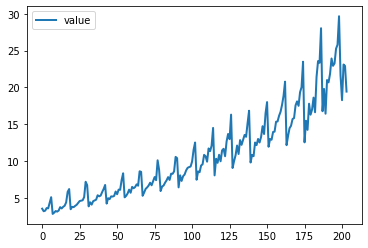

In [24]:
data2[['value']].plot(lw=2);

In [25]:
series2 = data2[["value"]].squeeze()
X = series2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [26]:
series2

0       3.526591
1       3.180891
2       3.252221
3       3.611003
4       3.565869
         ...    
199    21.654285
200    18.264945
201    23.107677
202    22.912510
203    19.431740
Name: value, Length: 204, dtype: float64

In [27]:
diff=series2.diff(1).fillna(0)

In [28]:
diff

0      0.000000
1     -0.345700
2      0.071330
3      0.358782
4     -0.045134
         ...   
199   -8.011071
200   -3.389340
201    4.842732
202   -0.195167
203   -3.480770
Name: value, Length: 204, dtype: float64

In [29]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.542662
p-value: 0.105436
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


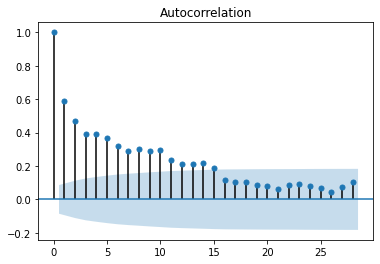

In [30]:
plot_acf(series)
plt.show()

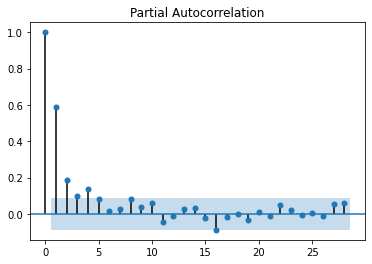

In [31]:
plot_pacf(series)
plt.show()

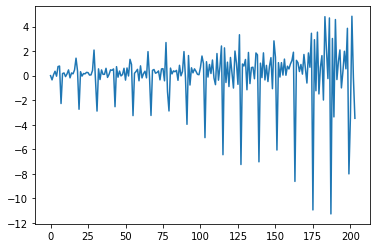

In [32]:
plt.plot(diff)
plt.show()

In [33]:
ARMA_model = ARIMA(endog=diff, order=(0, 0, 3))
results = ARMA_model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  204
Model:                     ARMA(0, 3)   Log Likelihood                -418.458
Method:                       css-mle   S.D. of innovations              1.876
Date:                Thu, 09 Jun 2022   AIC                            846.916
Time:                        16:51:36   BIC                            863.506
Sample:                             0   HQIC                           853.627
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0960      0.017      5.658      0.000       0.063       0.129
ma.L1.value    -0.6131      0.070     -8.804      0.000      -0.750      -0.477
ma.L2.value    -0.1000      0.083     -1.208    

In [34]:
pred = results.predict(0,203)

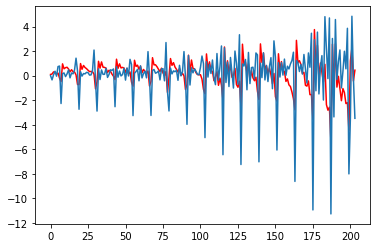

In [35]:

plt.plot(pred,color="red")
plt.plot(diff)
plt.show()